# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [65]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [66]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

Text(0.5, 1.0, 'Figure F')

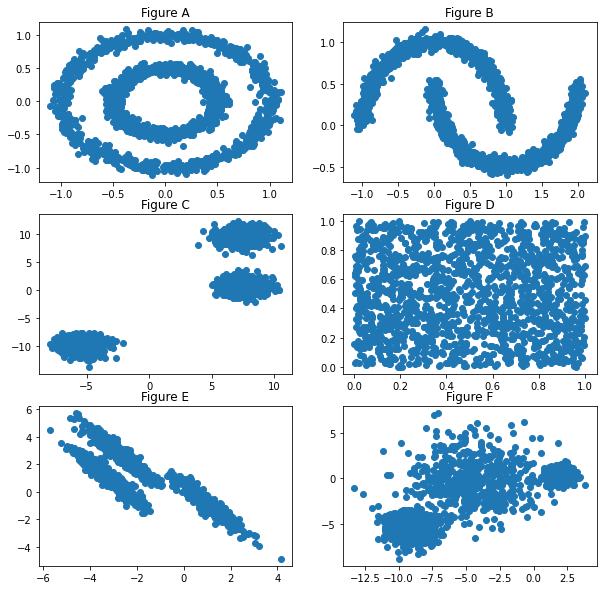

In [67]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))  #3 Zeilen und 2 Spalten
axs[0,0].scatter(A[:,0],A[:,1])
axs[0,0].set_title('Figure A')
axs[0,1].scatter(B[:,0],B[:,1])
axs[0,1].set_title('Figure B')
axs[1,0].scatter(C[:,0],C[:,1])
axs[1,0].set_title('Figure C')
axs[1,1].scatter(D[:,0],D[:,1])
axs[1,1].set_title('Figure D')
axs[2,0].scatter(E[:,0],E[:,1])
axs[2,0].set_title('Figure E')
axs[2,1].scatter(F[:,0],F[:,1])
axs[2,1].set_title('Figure F')

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [68]:
from sklearn.cluster import KMeans

In [77]:
#Cluster berechnen und anzeigen
A_KMeans = KMeans(n_clusters=2, init='k-means++').fit(A)
A_centers = A_KMeans.cluster_centers_

B_KMeans = KMeans(n_clusters=2, init='k-means++').fit(B)
B_centers = B_KMeans.cluster_centers_

C_KMeans = KMeans(n_clusters=3, init='k-means++').fit(C)
C_centers = C_KMeans.cluster_centers_

D_KMeans = KMeans(n_clusters=2, init='k-means++').fit(D)
D_centers = D_KMeans.cluster_centers_

E_KMeans = KMeans(n_clusters=3, init='k-means++').fit(E)
E_centers = E_KMeans.cluster_centers_

F_KMeans = KMeans(n_clusters=3, init='k-means++').fit(F)
F_centers = F_KMeans.cluster_centers_

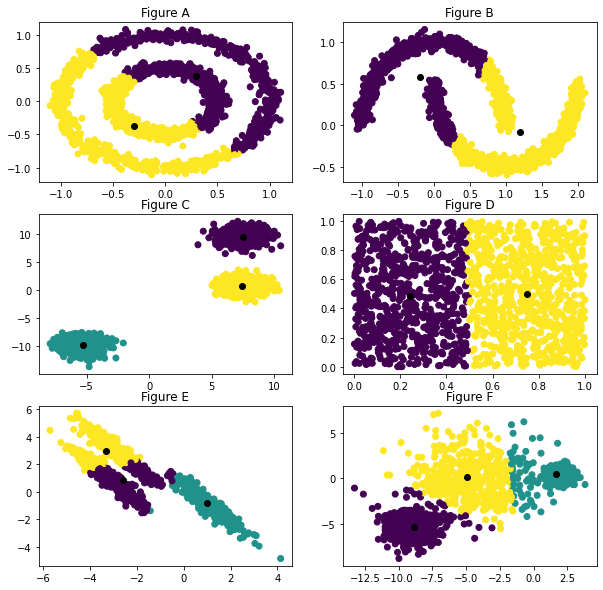

In [81]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))  #3 Zeilen und 2 Spalten
axs[0,0].scatter(A[:,0],A[:,1], c = A_KMeans.labels_)
axs[0,0].scatter(A_centers[:,0],A_centers[:,1], c = 'black')
axs[0,0].set_title('Figure A')

axs[0,1].scatter(B[:,0],B[:,1], c = B_KMeans.labels_)
axs[0,1].set_title('Figure B')
axs[0,1].scatter(B_centers[:,0],B_centers[:,1], c = 'black')

axs[1,0].scatter(C[:,0],C[:,1], c = C_KMeans.labels_)
axs[1,0].set_title('Figure C')
axs[1,0].scatter(C_centers[:,0],C_centers[:,1], c = 'black')

axs[1,1].scatter(D[:,0],D[:,1], c = D_KMeans.labels_)
axs[1,1].set_title('Figure D')
axs[1,1].scatter(D_centers[:,0],D_centers[:,1], c = 'black')

axs[2,0].scatter(E[:,0],E[:,1], c = E_KMeans.labels_)
axs[2,0].set_title('Figure E')
axs[2,0].scatter(E_centers[:,0],E_centers[:,1], c = 'black')

axs[2,1].scatter(F[:,0],F[:,1], c = F_KMeans.labels_)
axs[2,1].set_title('Figure F')
axs[2,1].scatter(F_centers[:,0],F_centers[:,1], c = 'black')

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


In [82]:
from sklearn.cluster import DBSCAN

In [166]:
A_cluster = DBSCAN(eps=0.2,min_samples=2).fit(A)
B_cluster = DBSCAN(eps=0.2,min_samples=2).fit(B)
C_cluster = DBSCAN(eps=1.5,min_samples=3).fit(C)
D_cluster = DBSCAN(eps=0.1,min_samples=2).fit(D)
E_cluster = DBSCAN(eps=0.2,min_samples=4).fit(E)
F_cluster = DBSCAN(eps=0.6,min_samples=3).fit(F)



Text(0.5, 1.0, 'Figure F')

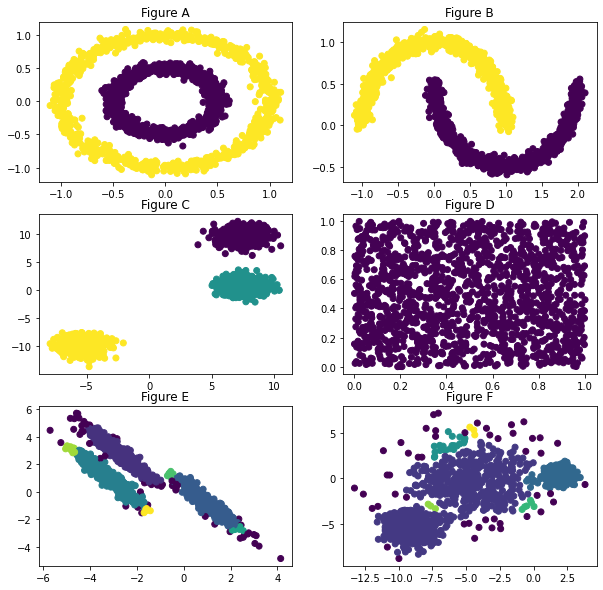

In [167]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))  #3 Zeilen und 2 Spalten
axs[0,0].scatter(A[:,0],A[:,1], c = A_cluster.labels_)
axs[0,0].set_title('Figure A')

axs[0,1].scatter(B[:,0],B[:,1], c = B_cluster.labels_)
axs[0,1].set_title('Figure B')


axs[1,0].scatter(C[:,0],C[:,1], c = C_cluster.labels_)
axs[1,0].set_title('Figure C')


axs[1,1].scatter(D[:,0],D[:,1], c = D_cluster.labels_)
axs[1,1].set_title('Figure D')


axs[2,0].scatter(E[:,0],E[:,1], c = E_cluster.labels_)
axs[2,0].set_title('Figure E')


axs[2,1].scatter(F[:,0],F[:,1], c = F_cluster.labels_)
axs[2,1].set_title('Figure F')
